In [8]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/vivianesilviana/vivianesilviana/main/data_air.csv", sep=";")
df

,BOD,DO,TSS
0,2.84,8.67,10.80
1,2.98,8.77,16.20
2,3.19,9.37,10.35
3,2.51,8.29,7.70
4,5.38,8.48,8.50
5,3.50,8.10,6.20
6,2.07,7.49,6.15
7,4.75,7.76,10.35
8,4.67,8.17,15.20
9,4.50,7.78,11.65


In [10]:
df=df.iloc[::,1:]     #membaca di excel
df

,DO,TSS
0,8.67,10.80
1,8.77,16.20
2,9.37,10.35
3,8.29,7.70
4,8.48,8.50
5,8.10,6.20
6,7.49,6.15
7,7.76,10.35
8,8.17,15.20
9,7.78,11.65


#Core and Reduct 

In [11]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [12]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['TSS']=faktor.iloc[::,-1]
    return df_CR

In [13]:
df_CR=Core_and_Reduct(df)
df_CR.head()


,DO,TSS
0,8.67,10.80
1,8.77,16.20
2,9.37,10.35
3,8.29,7.70
4,8.48,8.50


In [15]:
hasil=pd.DataFrame(df_CR)
hasil.columns=['DO','TSS']
hasil.to_csv('hasil_roughset.csv')

In [16]:
df.head()

,DO,TSS
0,8.67,10.80
1,8.77,16.20
2,9.37,10.35
3,8.29,7.70
4,8.48,8.50


In [17]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 

warnings.filterwarnings('ignore')

In [18]:
df_tsk=pd.read_csv("hasil_roughset.csv", sep=",")
df_tsk

,Unnamed: 0,DO,TSS
0,0,8.67,10.80
1,1,8.77,16.20
2,2,9.37,10.35
3,3,8.29,7.70
4,4,8.48,8.50
5,5,8.10,6.20
6,6,7.49,6.15
7,7,7.76,10.35
8,8,8.17,15.20
9,9,7.78,11.65


In [19]:
df.describe()

,DO,TSS
count,26.000000,26.000000
mean,8.300769,9.561923
std,0.803990,4.216010
min,7.080000,3.550000
25%,7.780000,6.212500
50%,8.230000,9.650000
75%,8.677500,11.450000
max,10.420000,18.600000


# Fuzzyfikasi

In [21]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [22]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[x_i]

    return hasil

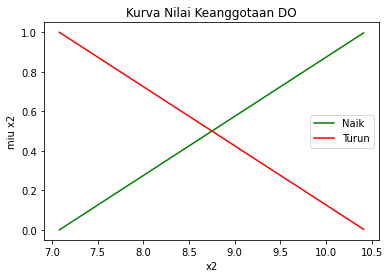

In [23]:
# Pembentukan Himpunan Fuzzy DO [fungsi buat sendiri]
x_do= np.arange(7.08, 10.42, 0.01) # Semesta Pembicaraan
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]

miu_do_naik  = fungsi_segitiga(x_do, amb_naik)
miu_do_turun = fungsi_segitiga(x_do, amb_turun)

import matplotlib.pyplot as plt
plt.plot(x_do, miu_do_naik,  label = "Naik",  color='green')
plt.plot(x_do, miu_do_turun, label = "Turun", color='red')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan DO')
plt.legend()
plt.show()

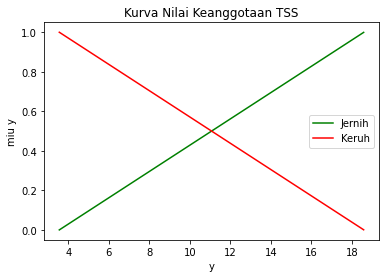

In [24]:
# Pembentukan Himpunan Fuzzy TSS [fungsi buat sendiri]
x_tss= np.arange(3.55, 18.60, 0.01) # Semesta Pembicaraan
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh  = [3.55,  3.55, 18.60]

miu_tss_jernih  = fungsi_segitiga(x_tss, amb_jernih)
miu_tss_keruh   = fungsi_segitiga(x_tss, amb_keruh)

import matplotlib.pyplot as plt
plt.plot(x_tss, miu_tss_jernih,  label = "Jernih",  color='green')
plt.plot(x_tss, miu_tss_keruh, label = "Keruh", color='red')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan TSS')
plt.legend()
plt.show()

In [25]:
def fuzzyfikasi(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))/2
    print(batas)
    hasil=0
    if x < batas:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    return hasil, label_hasil

In [26]:
x_do= np.arange(7.08, 10.43, 0.01) 
amb_naik  = [7.08, 10.42, 10.42]
amb_turun = [7.08,  7.08, 10.42]
    
fuzzifikasi_DO=[]
miu_DO=[]
for i in df.DO:
    hasil=fuzzyfikasi(x_do, amb_naik, amb_turun, i, "Turun", "Naik")
    fuzz = hasil[1]
    m =hasil[0]
    fuzzifikasi_DO.append(fuzz)
    miu_DO.append(m)
len(fuzzifikasi_DO)

8.749999999999964
{7.08: 0.0, 7.09: 0.0029940119760478406, 7.1: 0.005988023952095681, 7.11: 0.008982035928143521, 7.12: 0.011976047904191362, 7.13: 0.014970059880239202, 7.14: 0.017964071856287043, 7.15: 0.020958083832334884, 7.16: 0.023952095808382725, 7.17: 0.026946107784430566, 7.18: 0.029940119760478404, 7.19: 0.03293413173652625, 7.2: 0.035928143712574086, 7.21: 0.03892215568862192, 7.22: 0.04191616766466977, 7.23: 0.044910179640717605, 7.24: 0.04790419161676545, 7.25: 0.05089820359281329, 7.26: 0.05389221556886113, 7.27: 0.05688622754490897, 7.28: 0.05988023952095681, 7.29: 0.06287425149700465, 7.3: 0.0658682634730525, 7.31: 0.06886227544910033, 7.32: 0.07185628742514817, 7.33: 0.07485029940119602, 7.34: 0.07784431137724385, 7.35: 0.08083832335329169, 7.36: 0.08383233532933954, 7.37: 0.08682634730538738, 7.38: 0.08982035928143521, 7.39: 0.09281437125748306, 7.4: 0.0958083832335309, 7.41: 0.09880239520957873, 7.42: 0.10179640718562658, 7.43: 0.10479041916167442, 7.44: 0.1077844311

26

In [27]:
x_tss= np.arange(3.55, 18.61, 0.01)
amb_jernih  = [3.55, 18.60, 18.60]
amb_keruh   = [3.55,  3.55, 18.60]
    
fuzzifikasi_TSS=[]
miu_TSS=[]
for i in df.TSS:
    hasil=fuzzyfikasi(x_tss, amb_jernih, amb_keruh, i, "Keruh", "Jernih")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_TSS.append(fuzz)
    miu_TSS.append(m)
len(fuzzifikasi_TSS)

11.07499999999984
{3.55: 0.0, 3.56: 0.0006644518272425108, 3.57: 0.0013289036544850215, 3.58: 0.001993355481727532, 3.59: 0.002657807308970043, 3.6: 0.0033222591362125535, 3.61: 0.003986710963455064, 3.62: 0.0046511627906975755, 3.63: 0.005315614617940086, 3.64: 0.0059800664451825965, 3.65: 0.006644518272425107, 3.66: 0.007308970099667618, 3.67: 0.007973421926910128, 3.68: 0.008637873754152639, 3.69: 0.009302325581395151, 3.7: 0.009966777408637661, 3.71: 0.010631229235880172, 3.72: 0.011295681063122683, 3.73: 0.011960132890365193, 3.74: 0.012624584717607704, 3.75: 0.013289036544850214, 3.76: 0.013953488372092725, 3.77: 0.014617940199335235, 3.78: 0.015282392026577746, 3.79: 0.015946843853820256, 3.8: 0.016611295681062767, 3.81: 0.017275747508305277, 3.82: 0.017940199335547788, 3.83: 0.018604651162790302, 3.84: 0.019269102990032812, 3.85: 0.019933554817275323, 3.86: 0.020598006644517834, 3.87: 0.021262458471760344, 3.88: 0.021926910299002855, 3.89: 0.022591362126245365, 3.9: 0.023255813

26

In [28]:
df_fuzz = pd.DataFrame({"DO":df.DO,
                        "TSS":df.TSS,
                       "DO_fuzz": fuzzifikasi_DO,
                       "TSS_fuzz": fuzzifikasi_TSS,
                       "miu_DO":miu_DO,
                       "miu_TSS":miu_TSS,})
df_fuzz

,DO,TSS,DO_fuzz,TSS_fuzz,miu_DO,miu_TSS
0,8.67,10.80,Turun,Keruh,4.760479e-01,4.817276e-01
1,8.77,16.20,Naik,Jernih,4.940120e-01,1.594684e-01
2,9.37,10.35,Naik,Keruh,3.143713e-01,4.518272e-01
3,8.29,7.70,Turun,Keruh,3.622754e-01,2.757475e-01
4,8.48,8.50,Turun,Keruh,4.191617e-01,3.289037e-01
5,8.10,6.20,Turun,Keruh,3.053892e-01,1.760797e-01
6,7.49,6.15,Turun,Keruh,1.227545e-01,1.727575e-01
7,7.76,10.35,Turun,Keruh,2.035928e-01,4.518272e-01
8,8.17,15.20,Turun,Jernih,3.263473e-01,2.259136e-01
9,7.78,11.65,Turun,Jernih,2.095808e-01,4.617940e-01


# Rule Generation

In [29]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['DO_fuzz'] + " maka Y " + df_fuzz['TSS_fuzz']
df_fuzz.head()

,DO,TSS,DO_fuzz,TSS_fuzz,miu_DO,miu_TSS,Rule
0,8.67,10.80,Turun,Keruh,0.476048,0.481728,Jika X1 Turun maka Y Keruh
1,8.77,16.20,Naik,Jernih,0.494012,0.159468,Jika X1 Naik maka Y Jernih
2,9.37,10.35,Naik,Keruh,0.314371,0.451827,Jika X1 Naik maka Y Keruh
3,8.29,7.70,Turun,Keruh,0.362275,0.275748,Jika X1 Turun maka Y Keruh
4,8.48,8.50,Turun,Keruh,0.419162,0.328904,Jika X1 Turun maka Y Keruh


In [30]:
df_fuzz['Rule'].value_counts()

 Jika X1 Turun maka Y Keruh     16
 Jika X1 Turun maka Y Jernih     4
 Jika X1 Naik maka Y Jernih      3
 Jika X1 Naik maka Y Keruh       3
Name: Rule, dtype: int64

# TSK Prediction

In [34]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Rule 1
rule_1 = df_fuzz[df_fuzz['Rule']=="Jika X1 Turun maka Y Keruh"]
index=rule_1.index

data_rule_1=df_fuzz.iloc[index,:3]

X=np.array(data_rule_1.iloc[::,:-1])
Y=np.array(data_rule_1.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_1['pred'] = y_pred
data_rule_1

ValueError: ignored

In [36]:
# Rule 2
rule_2 = df_fuzz[df_fuzz['Rule']=="Jika X1 Turun maka Y Jernih"]
index=rule_2.index

data_rule_2=df_fuzz.iloc[index,:3]

X=np.array(data_rule_2.iloc[::,:-1])
Y=np.array(data_rule_2.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_2['pred'] = y_pred
data_rule_2

ValueError: ignored

In [ ]:
# Rule 3
rule_3 = df_fuzz[df_fuzz['Rule']=="Jika X1 Naik maka Y Jernih"]
index=rule_3.index

data_rule_3=df_fuzz.iloc[index,:3]

X=np.array(data_rule_3.iloc[::,:-1])
Y=np.array(data_rule_3.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_3['pred'] = y_pred
data_rule_3

In [ ]:
# Rule 4
rule_4 = df_fuzz[df_fuzz['Rule']=="Jika X1 Naik maka Y Keruh"]
index=rule_4.index

data_rule_4=df_fuzz.iloc[index,:3]

X=np.array(data_rule_4.iloc[::,:-1])
Y=np.array(data_rule_4.iloc[::,:1])

# Membuat model regressi dengan library Scikit Learn
regressor = LinearRegression()  
# Proses Training Model
regressor.fit(X, Y) 

#Prediksi
y_pred = regressor.predict(X)
y_pred


data_rule_4['pred'] = y_pred
data_rule_4

In [ ]:
df_pred=pd.concat([data_rule_1,data_rule_2,data_rule_3,data_rule_4], ignore_index=False)
df_pred.sort_index()

In [ ]:
df_fuzz

In [ ]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_BOD','miu_DO']].min(axis=1)
df_fuzz.head()

In [ ]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz.head()

In [ ]:
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz.head()

In [ ]:
x1= df_fuzz.index
y1= df_fuzz.TSS
y2= df_fuzz['Pred TSK']

In [ ]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi FUZZY TSK Linear')
plt.legend()
plt.show()